In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Black Friday Sales Data Analysis

In [262]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [263]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [264]:
del df['Product_Category_2']
del df['Product_Category_3']

In [265]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [266]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [267]:
df['User_ID'].nunique()

5891

In [268]:
df['Product_ID'].nunique()

3623

In [269]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [270]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [271]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [272]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [273]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [274]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [275]:
df['Purchase'].nunique()

17959

In [276]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [277]:
for i in df:
    print(i ,":" ,df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analysing Gender

<Axes: title={'center': 'Gender Ratio'}, ylabel='Ratio'>

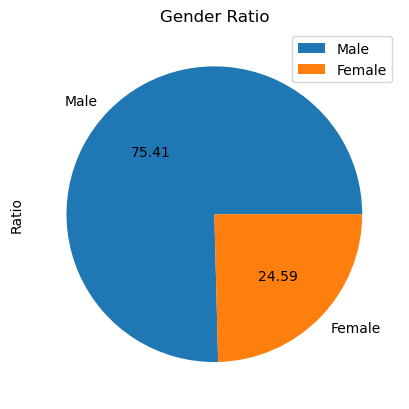

In [279]:
df1 = pd.DataFrame({"Ratio" : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]} , index = ["Male","Female"])
df1.plot.pie(
             autopct = "%.2f",
             title = "Gender Ratio",
             y = "Ratio"
    
)

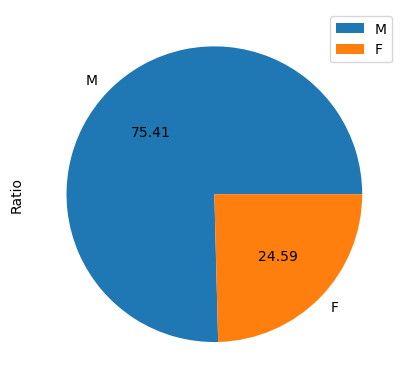

In [280]:
df['Gender'].value_counts( ascending = False).plot( kind = 'pie' , autopct = "%.2f" , label = 'Ratio')
# plt.ylabel('Ratio')
plt.legend()
plt.show()

<Axes: title={'center': 'Gender Ratio'}>

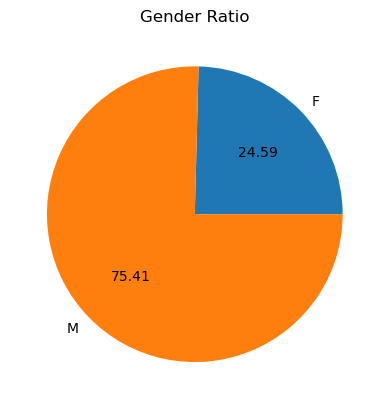

In [281]:
df.groupby("Gender").size().plot(kind = 'pie',
                                 y = "Ratio",
                                 autopct = '%.2f',
                                 title = 'Gender Ratio'
                                )

## Analysis Age and Marital Status

<Axes: title={'center': 'Purchase distribution by Age'}, xlabel='Age'>

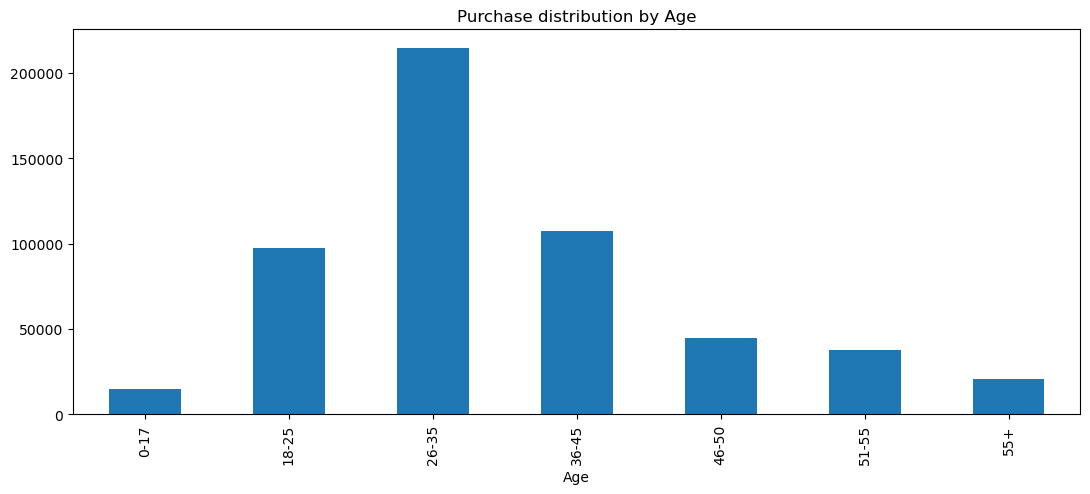

In [283]:
df.groupby( "Age" ).size().plot( kind = 'bar' , figsize = (13,5) , title = 'Purchase distribution by Age')

<Axes: xlabel='Age'>

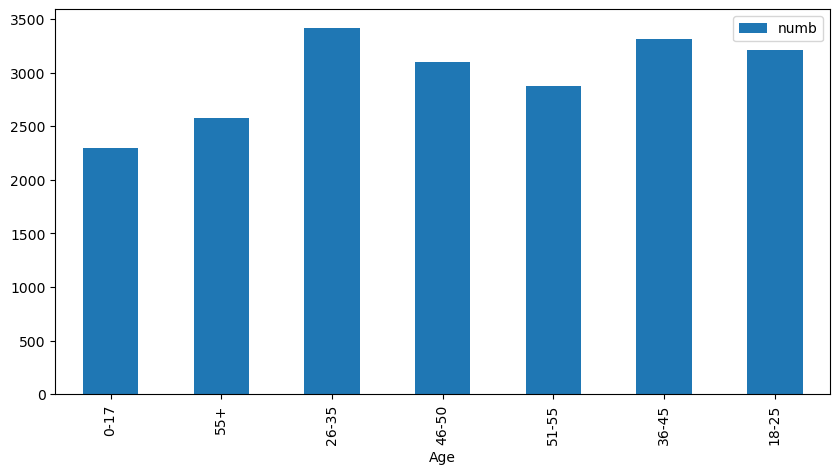

In [284]:
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst , columns = ['Age','numb'])
data.plot.bar( x = 'Age' , figsize = (10,5))

C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

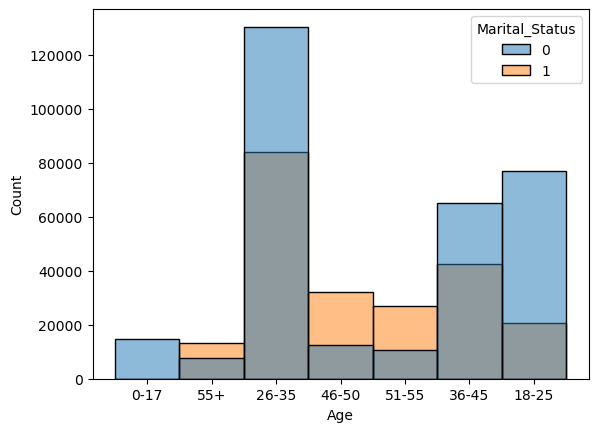

In [285]:
sns.histplot(x = 'Age' , hue = 'Marital_Status' , data = df)

<Axes: xlabel='Age'>

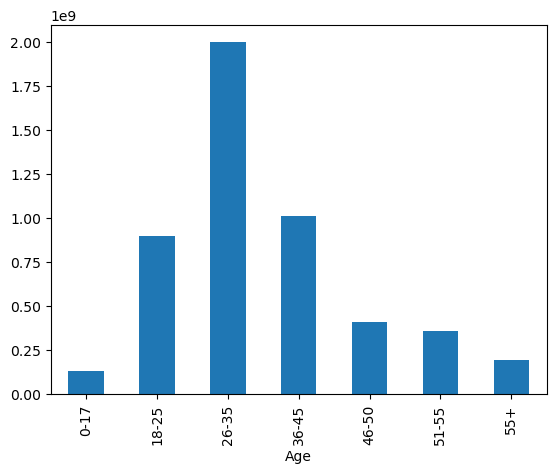

In [286]:
df.groupby('Age').sum()['Purchase'].plot( kind = 'bar' , x = 'Amount spent by different Age' ) 

## Multi-column Analysis

<Axes: >

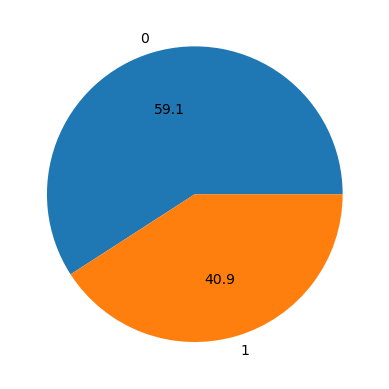

In [288]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Gender', ylabel='count'>

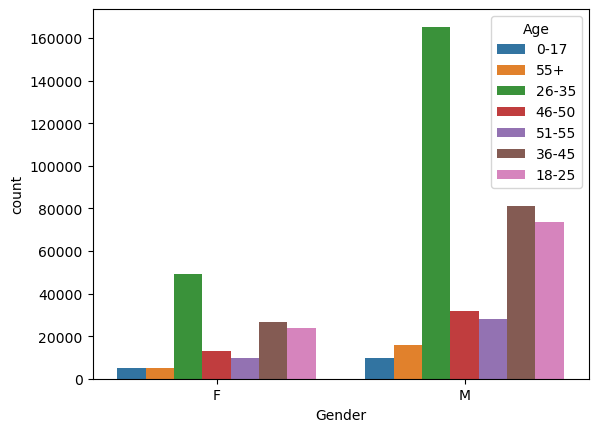

In [289]:
sns.countplot( x = 'Gender' , data = df , hue = 'Age')

<Axes: xlabel='Age', ylabel='count'>

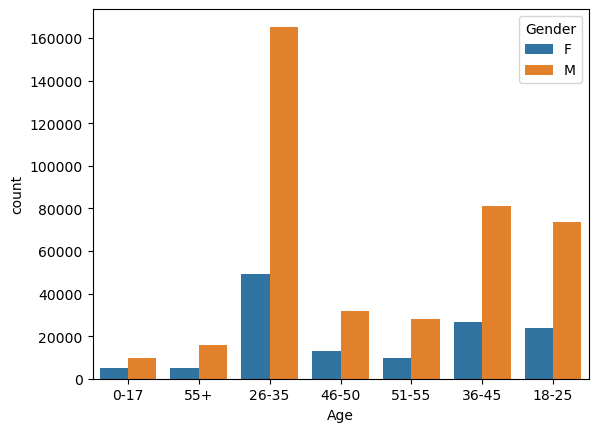

In [290]:
sns.countplot( x = 'Age' , data = df , hue = 'Gender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

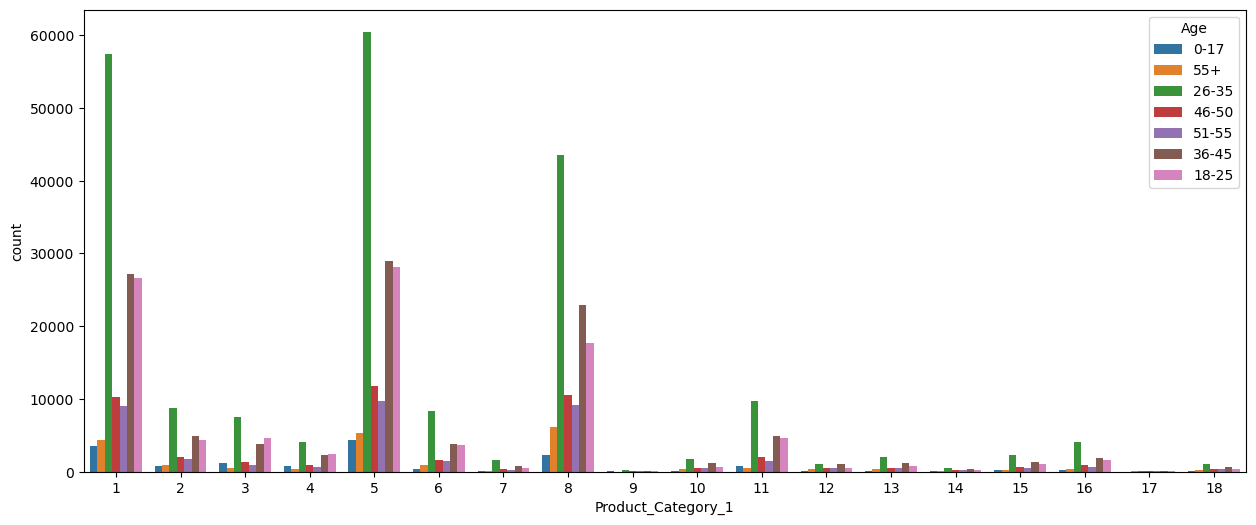

In [291]:
plt.figure(figsize = (15,6))
sns.countplot( x = 'Product_Category_1' , data = df , hue = 'Age')

C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

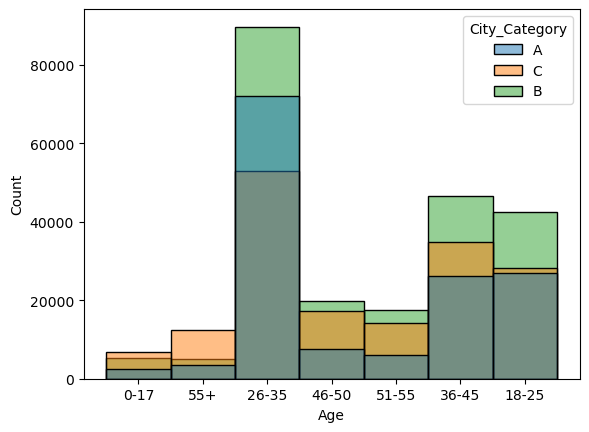

In [292]:
sns.histplot(x = 'Age' , hue = 'City_Category' , data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

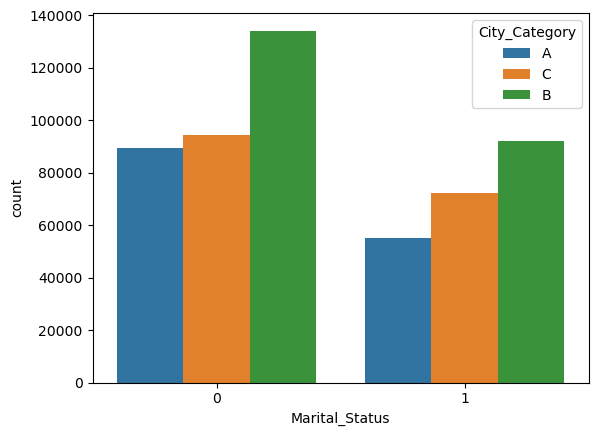

In [293]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: xlabel='Age', ylabel='count'>

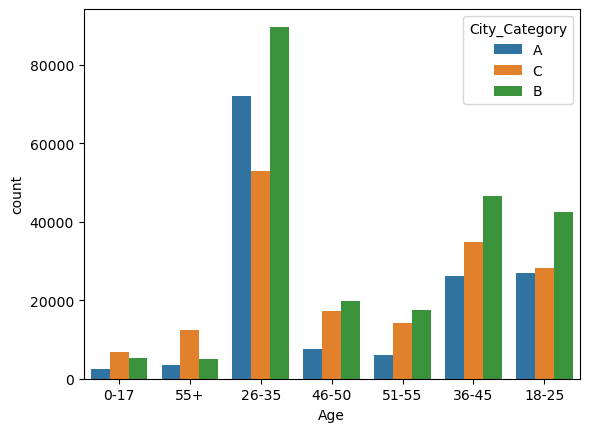

In [294]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

## Occupation and Products Analysis

In [296]:
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

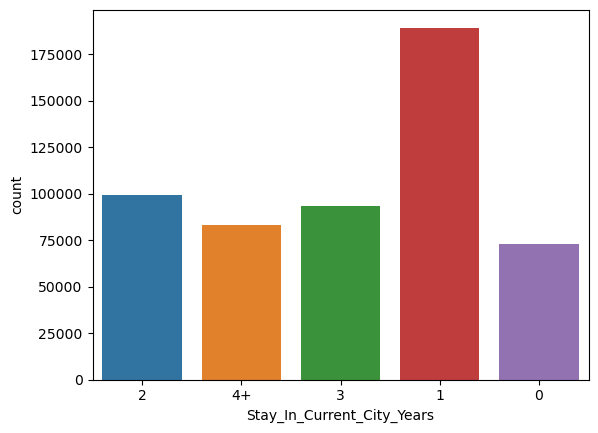

In [297]:
sns.countplot( x = df['Stay_In_Current_City_Years'])

<Axes: >

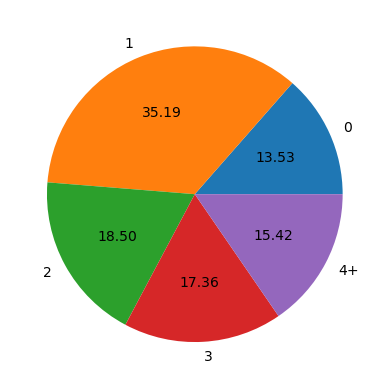

In [298]:
df.groupby('Stay_In_Current_City_Years').size().plot( kind = 'pie' , autopct = "%.2f" )

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

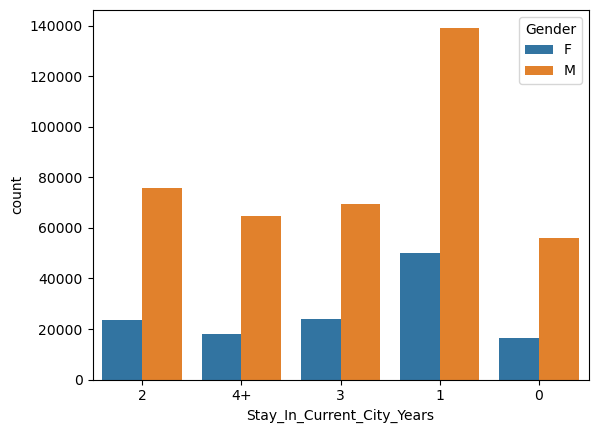

In [299]:
sns.countplot(x = 'Stay_In_Current_City_Years' , data = df , hue = 'Gender')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

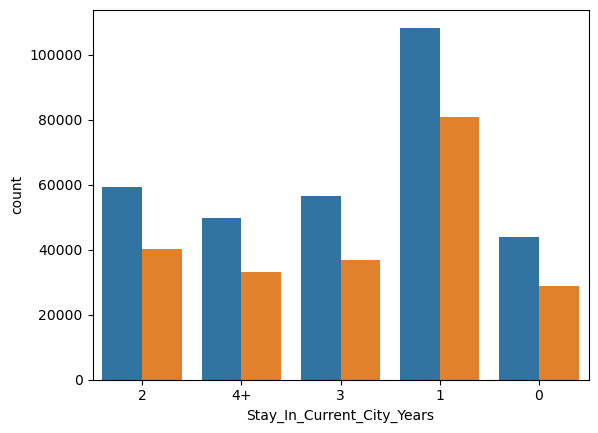

In [300]:
sns.countplot(x = 'Stay_In_Current_City_Years' , hue = 'Marital_Status' , data = df )

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

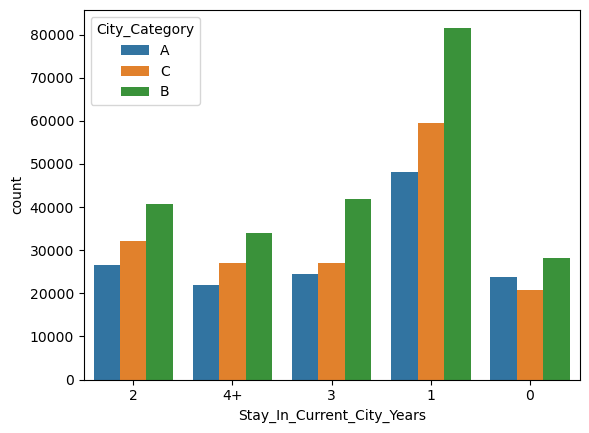

In [301]:
sns.countplot(x = 'Stay_In_Current_City_Years' , hue = 'City_Category' , data = df )

<Axes: xlabel='Stay_In_Current_City_Years'>

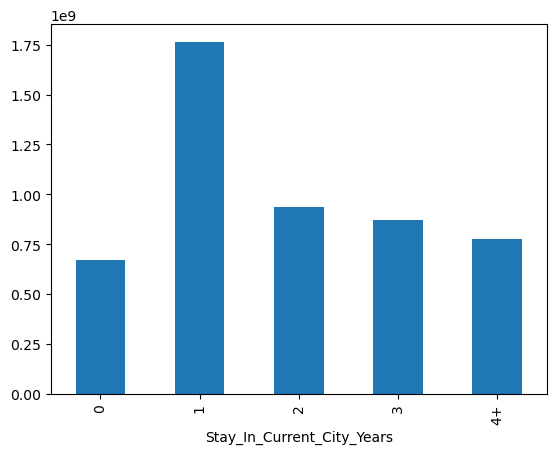

In [303]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot( kind = 'bar' )

<Axes: xlabel='Occupation', ylabel='count'>

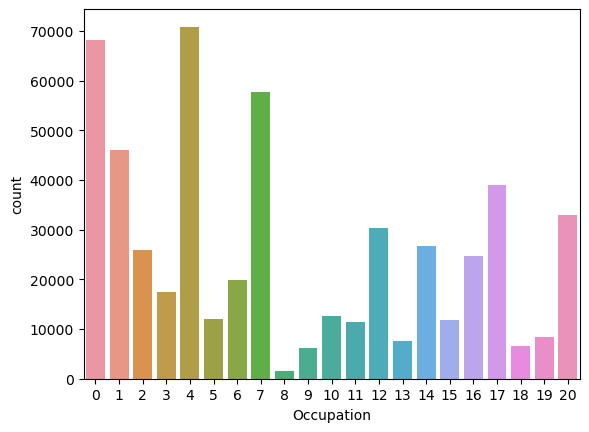

In [304]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation', ylabel='count'>

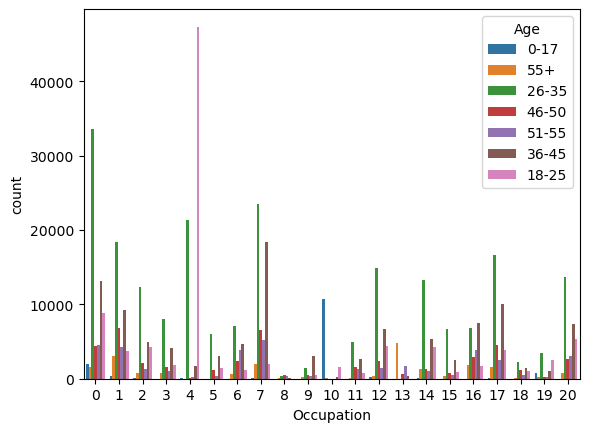

In [307]:
sns.countplot(x = 'Occupation' , hue = 'Age', data = df)

<Axes: xlabel='Occupation'>

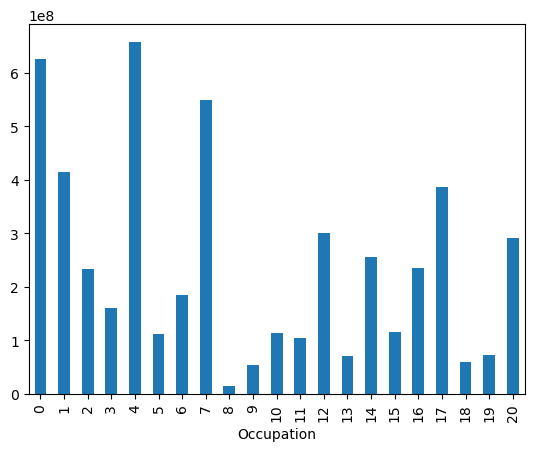

In [308]:
df.groupby('Occupation').sum()['Purchase'].plot( kind = 'bar' )

<Axes: xlabel='Occupation'>

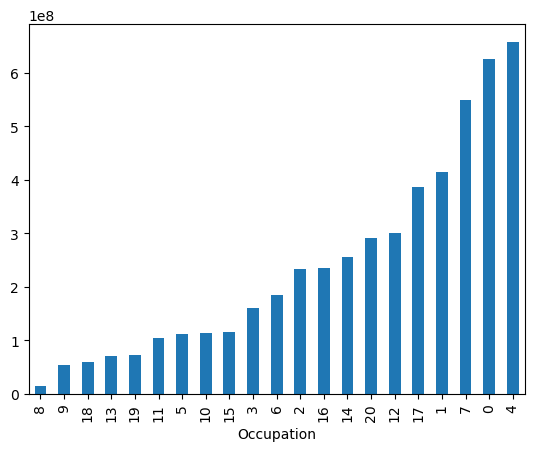

In [309]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot( kind = 'bar' )

<Axes: xlabel='Occupation'>

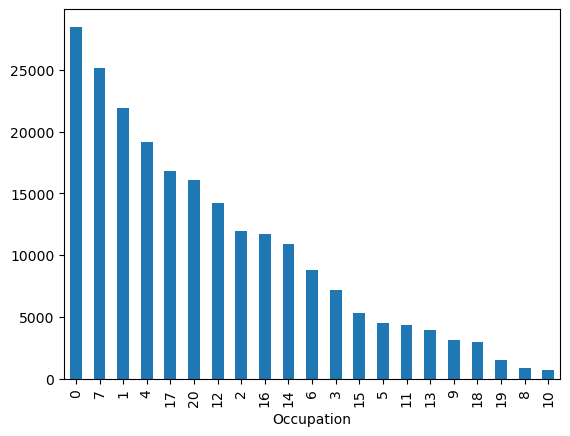

In [311]:
df.groupby('Occupation').sum()['Marital_Status'].sort_values(ascending = False).plot( kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

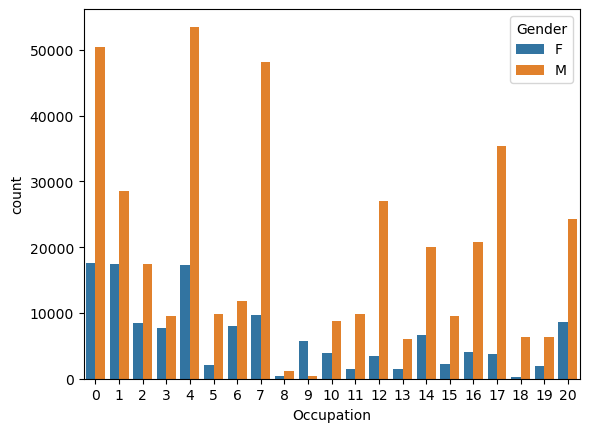

In [312]:
sns.countplot(x = 'Occupation' , hue = 'Gender', data = df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

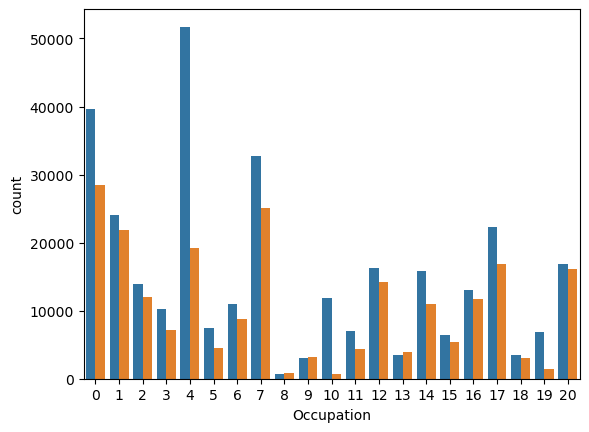

In [313]:
sns.countplot(x = 'Occupation' , hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation'>

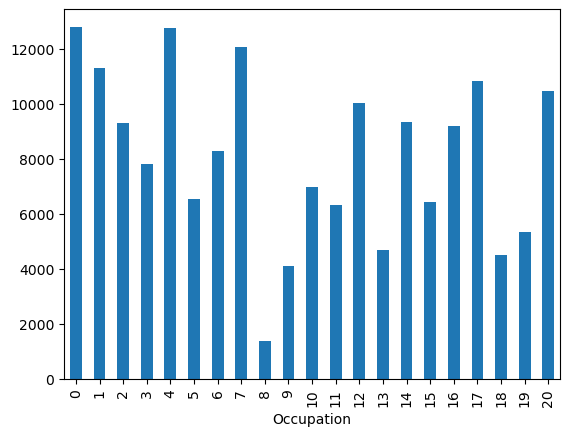

In [318]:
df.groupby('Occupation').nunique()['Purchase'].plot( kind = 'bar')

<Axes: xlabel='Occupation'>

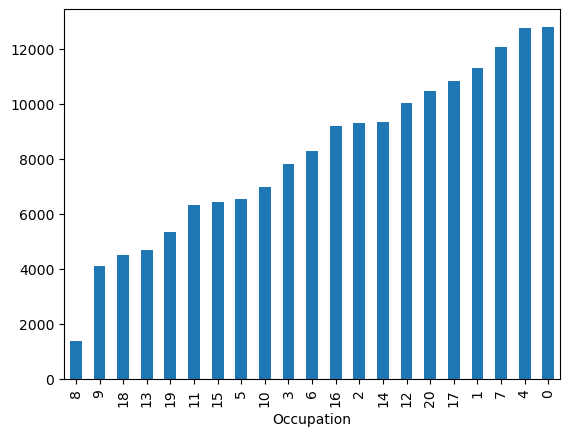

In [319]:
df.groupby('Occupation').nunique()['Purchase'].sort_values().plot( kind = 'bar')

<Axes: xlabel='Product_Category_1'>

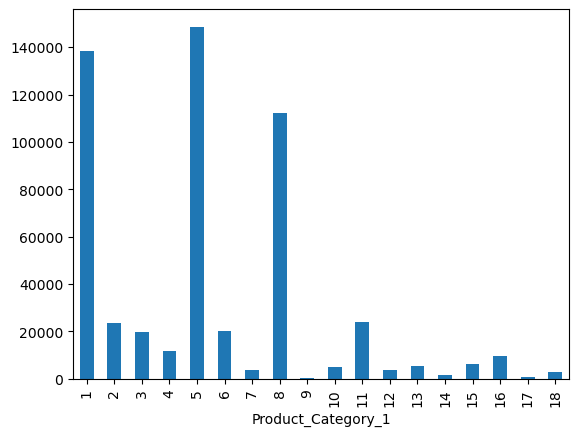

In [320]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

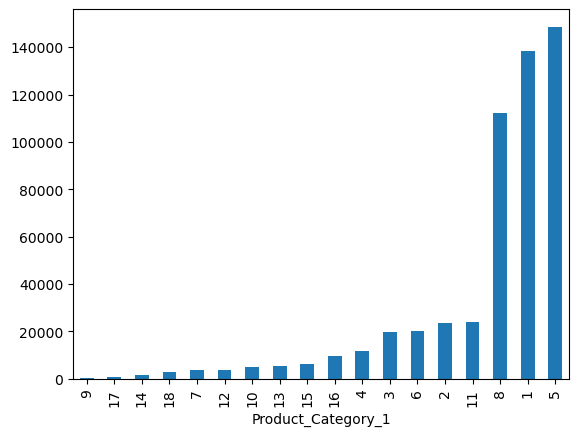

In [324]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

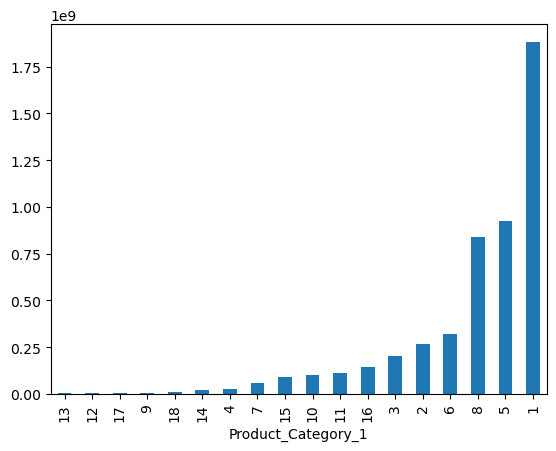

In [325]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

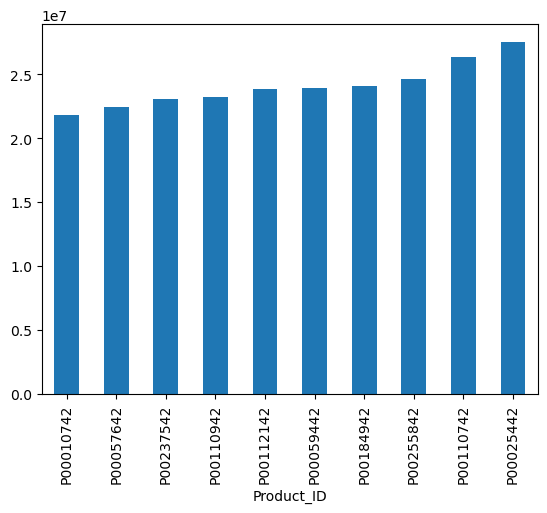

In [327]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

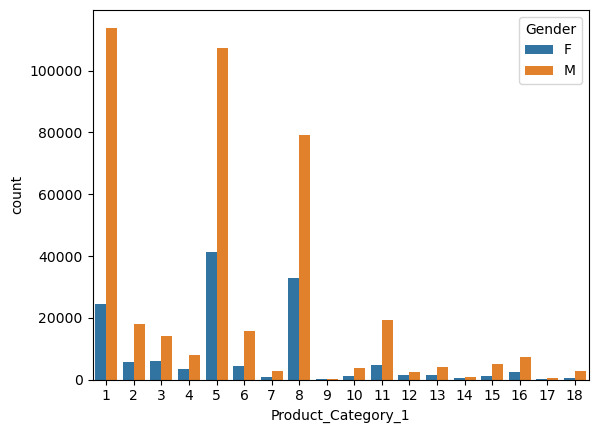

In [328]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

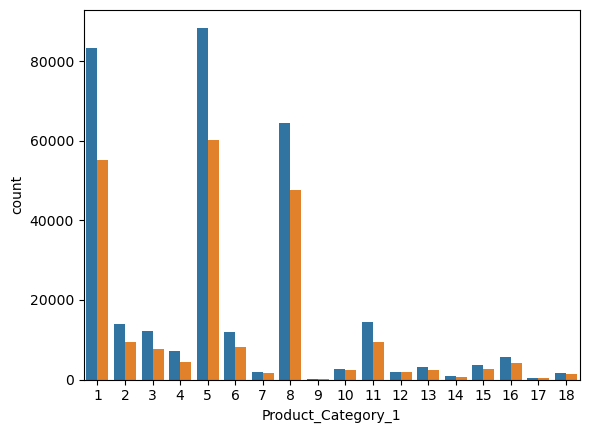

In [329]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)


## Combining Age & Marital Status

In [333]:
lst = []
for i in range(len(df)):
    lst.append( df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['Gender_Marital'] = lst

<Axes: xlabel='Gender_Marital', ylabel='count'>

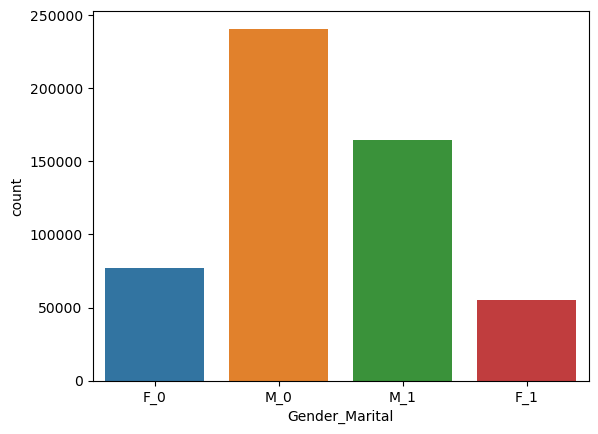

In [334]:
sns.countplot( x = 'Gender_Marital' , data =df )

<Axes: xlabel='Gender_Marital', ylabel='count'>

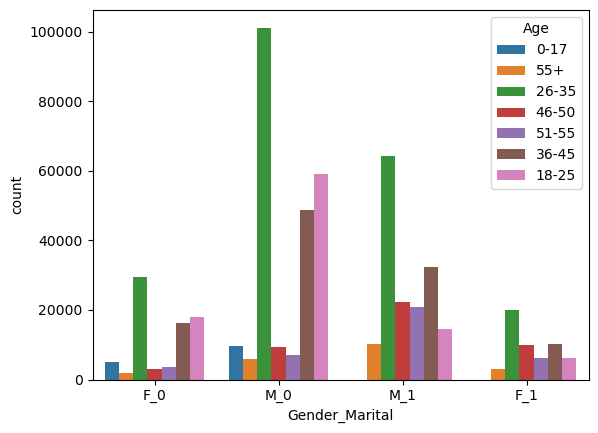

In [335]:
sns.countplot( x = 'Gender_Marital' , hue = df['Age'] , data =df)

<Axes: xlabel='Age', ylabel='count'>

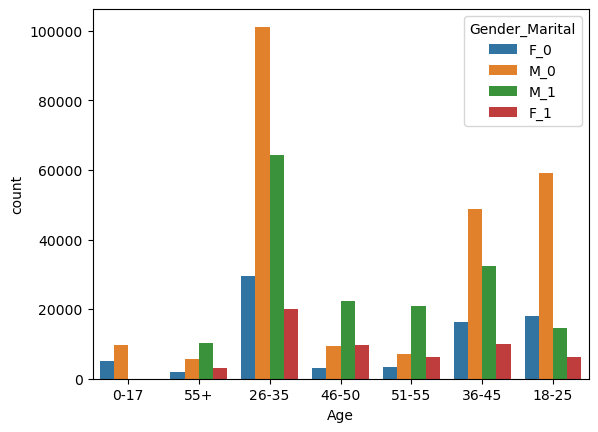

In [336]:
sns.countplot( x = df['Age'] , hue = df['Gender_Marital'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

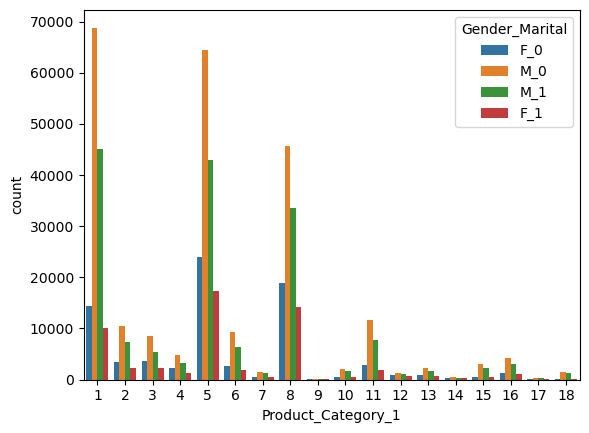

In [337]:
sns.countplot(x = df['Product_Category_1'], hue = df['Gender_Marital'])


<Axes: xlabel='City_Category', ylabel='count'>

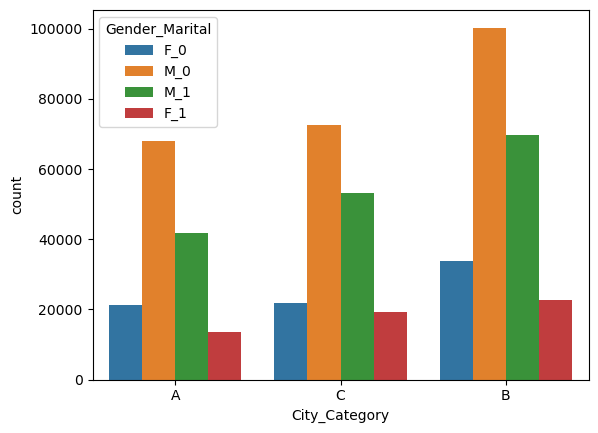

In [338]:
sns.countplot(x = df['City_Category'], hue = df['Gender_Marital'])


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

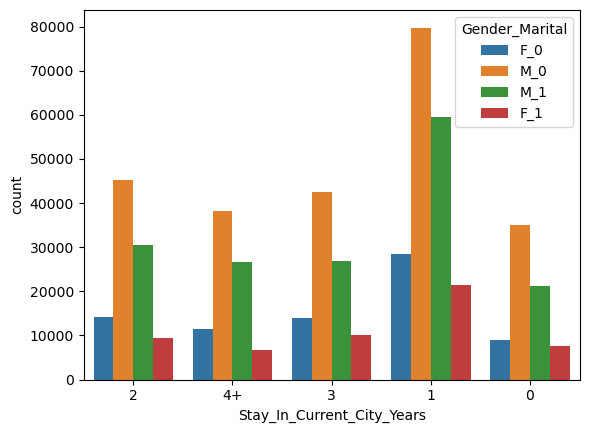

In [339]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Gender_Marital'])

<Axes: xlabel='City_Category', ylabel='count'>

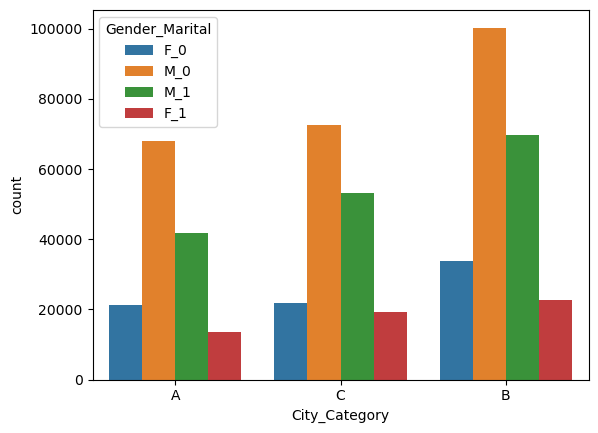

In [340]:
sns.countplot(x = df['City_Category'], hue = df['Gender_Marital'])